<a href="https://colab.research.google.com/github/sreeproject/AI-/blob/main/K_meansclustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
!wget https://archive.ics.uci.edu/dataset/352/online+retail

--2024-02-22 22:21:23--  https://archive.ics.uci.edu/dataset/352/online+retail
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 163117 (159K) [text/html]
Saving to: ‘online+retail.1’

online+retail.1     100%[===================>] 159.29K  --.-KB/s    in 0.06s   

2024-02-22 22:21:23 (2.40 MB/s) - ‘online+retail.1’ saved [163117/163117]



In [15]:
!ls -l

total 35780
-rw-r--r-- 1 root root   163118 Feb 22 22:14  online+retail
-rw-r--r-- 1 root root   163117 Feb 22 22:21  online+retail.1
-rw-r--r-- 1 root root 17825792 Feb 22 22:21 'Online Retail.xlsx'
-rw-r--r-- 1 root root 18472598 Feb 22 22:21  online+retail.zip
drwxr-xr-x 1 root root     4096 Feb 21 14:21  sample_data


In [16]:
import os

file_path = "Online Retail.xlsx"
if os.path.isfile(file_path):
    print("File exists")
else:
    print("File does not exist")

File exists


In [18]:
import pandas as pd
df=pd.read_excel('Online Retail.xlsx')

In [19]:
df.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom


In [20]:
df.shape

(541909, 8)

In [21]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [22]:
df.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [23]:
df.dropna(inplace=True)

In [24]:
df.shape

(406829, 8)

In [25]:
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

# Explore & Visualize Dataset

**Number of Unique customers**

In [26]:
len(df.CustomerID.unique())

4372

**Geografic information**

In [27]:
len(df.Country.unique())

37

In [28]:
df.Country.unique()

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Austria',
       'Israel', 'Finland', 'Greece', 'Singapore', 'Lebanon',
       'United Arab Emirates', 'Saudi Arabia', 'Czech Republic', 'Canada',
       'Unspecified', 'Brazil', 'USA', 'European Community', 'Bahrain',
       'Malta', 'RSA'], dtype=object)

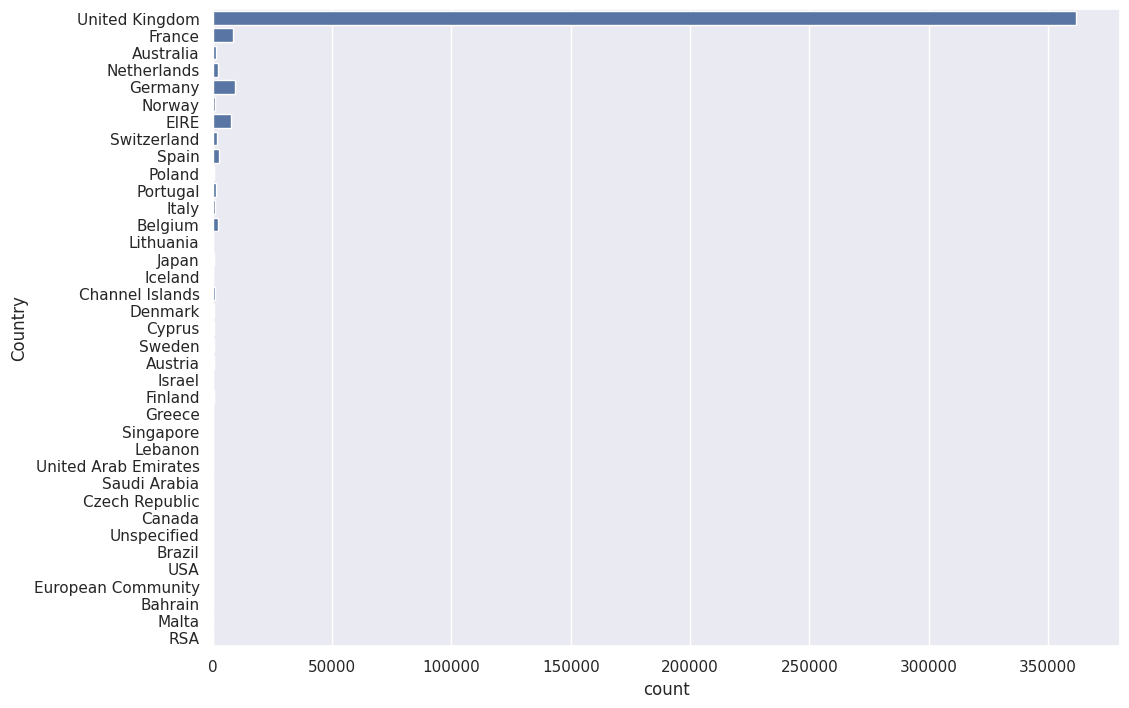

In [29]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.countplot(y='Country',data=df)
plt.show()

# Lets remove non-UK records as enough geographic details about other countys/region not aviable

In [30]:
df=df[df.Country.isin(['United Kingdom'])]

In [31]:
df.shape

(361878, 8)

In [32]:
df.Country.unique()

array(['United Kingdom'], dtype=object)

# Number of unique customers in UK

In [33]:
len(df.CustomerID.unique())

3950

# Number unique products

In [ ]:
len(df.StockCode.unique())

3661

# Invoice Date range

In [ ]:
df.InvoiceDate.min(), df.InvoiceDate.max()

(Timestamp('2010-12-01 08:26:00'), Timestamp('2011-12-09 12:49:00'))

# Remove invoice for returns

# Number of invoice returns

In [34]:
df=df[~df.InvoiceNo.str.startswith('C').fillna(False)]

In [35]:
df.shape

(354345, 8)

In [36]:
df.head(n=10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom


# Criteria to cluster(group) Customers
1.**Monetory Value** -  How much money customer spend with us(Cumilative and session wise ex: quaterlys,holidays/week ends)

2.**Freequency** -  How often do customer come to spend wit us

3.*Items Freequency* How many item of each type bought by the cutomer

4.**Recency** - When was the late item they purchised from us


Customer Segmentation using **RFM Analysis**

# Build a customer Dataset

In [37]:
# Extract unique customer IDs from the 'CustomerID' column of your DataFrame df
unique_customer_ids = df['CustomerID'].unique()

# Create a new DataFrame with a single column named 'CustomerID'
cust_df = pd.DataFrame(unique_customer_ids, columns=['CustomerID'])

In [38]:
cust_df.head()

,CustomerID
0,17850.0
1,13047.0
2,13748.0
3,15100.0
4,15291.0


In [39]:
cust_df.columns

Index(['CustomerID'], dtype='object')

# Number of customers

In [40]:
cust_df.shape

(3921, 1)

# Recency of Purchaise

In [41]:
df['Recency']=(pd.datetime(2011,12,10) - pd.to_datetime(df['InvoiceDate'])).dt.days

<ipython-input-41-9110009aeb21>:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  df['Recency']=(pd.datetime(2011,12,10) - pd.to_datetime(df['InvoiceDate'])).dt.days


In [42]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Recency
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,373
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,373
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,373
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,373
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,373


In [43]:
df.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Recency
541889,581585,22466,FAIRY TALE COTTAGE NIGHT LIGHT,12,2011-12-09 12:31:00,1.95,15804.0,United Kingdom,0
541890,581586,22061,LARGE CAKE STAND HANGING STRAWBERY,8,2011-12-09 12:49:00,2.95,13113.0,United Kingdom,0
541891,581586,23275,SET OF 3 HANGING OWLS OLLIE BEAK,24,2011-12-09 12:49:00,1.25,13113.0,United Kingdom,0
541892,581586,21217,RED RETROSPOT ROUND CAKE TINS,24,2011-12-09 12:49:00,8.95,13113.0,United Kingdom,0
541893,581586,20685,DOORMAT RED RETROSPOT,10,2011-12-09 12:49:00,7.08,13113.0,United Kingdom,0


In [44]:
recency_df=df.groupby('CustomerID',as_index=False).agg({'Recency':'min'}) # Min Recency

In [ ]:
recency_df.head()

,CustomerID,Recency
0,12346.0,325
1,12747.0,2
2,12748.0,0
3,12749.0,3
4,12820.0,3


In [45]:
recency_df.shape

(3921, 2)

In [46]:
cust_df = cust_df.merge(recency_df,left_on='CustomerID',right_on='CustomerID') #merge cust_df , recency_df

In [47]:
cust_df.shape

(3921, 2)

In [48]:
cust_df

,CustomerID,Recency
0,17850.0,372
1,13047.0,31
2,13748.0,95
3,15100.0,333
4,15291.0,25
...,...,...
3916,15471.0,2
3917,13436.0,1
3918,15520.0,1
3919,13298.0,1


# Frequency of Invoice

**Number of invoice per customer**

In [49]:
inv_df = df[['CustomerID', 'InvoiceNo']]



In [50]:
inv_df.drop_duplicates(inplace=True)

<ipython-input-50-eaeae2f5b6e5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  inv_df.drop_duplicates(inplace=True)


In [51]:
inv_df

,CustomerID,InvoiceNo
0,17850.0,536365
7,17850.0,536366
9,13047.0,536367
21,13047.0,536368
25,13047.0,536369
...,...,...
541863,17581.0,581582
541865,13777.0,581583
541867,13777.0,581584
541869,15804.0,581585


In [ ]:
#,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,

In [52]:
frequency_df=df.groupby('CustomerID',as_index=False).agg({'InvoiceNo':'count'})

In [ ]:
#---------------------------------------------------------------------------------

In [53]:
frequency_df.InvoiceNo.sum()

354345

In [54]:
df.shape

(354345, 9)

In [ ]:
#-----------------------------------------------------------------------------------

In [55]:
frequency_df.shape

(3921, 2)

In [56]:
frequency_df

,CustomerID,InvoiceNo
0,12346.0,1
1,12747.0,103
2,12748.0,4596
3,12749.0,199
4,12820.0,59
...,...,...
3916,18280.0,10
3917,18281.0,7
3918,18282.0,12
3919,18283.0,756


In [57]:
cust_df = cust_df.merge(frequency_df,left_on='CustomerID',right_on='CustomerID') #merge cust_df , frequency_df

In [58]:
cust_df.shape

(3921, 3)

In [59]:
cust_df

,CustomerID,Recency,InvoiceNo
0,17850.0,372,297
1,13047.0,31,172
2,13748.0,95,28
3,15100.0,333,3
4,15291.0,25,103
...,...,...,...
3916,15471.0,2,77
3917,13436.0,1,12
3918,15520.0,1,18
3919,13298.0,1,2


# Monetory value of purchise

In [60]:
df['Sales'] = df['Quantity']* df['UnitPrice']

In [61]:
monetory_df=df.groupby('CustomerID',as_index=False).agg({'Sales':'sum'})

In [62]:
monetory_df.shape

(3921, 2)

In [63]:
monetory_df

,CustomerID,Sales
0,12346.0,77183.60
1,12747.0,4196.01
2,12748.0,33719.73
3,12749.0,4090.88
4,12820.0,942.34
...,...,...
3916,18280.0,180.60
3917,18281.0,80.82
3918,18282.0,178.05
3919,18283.0,2094.88


In [64]:
cust_df = cust_df.merge(monetory_df,left_on='CustomerID',right_on='CustomerID')

In [65]:
cust_df.shape

(3921, 4)

In [66]:
cust_df

,CustomerID,Recency,InvoiceNo,Sales
0,17850.0,372,297,5391.21
1,13047.0,31,172,3237.54
2,13748.0,95,28,948.25
3,15100.0,333,3,876.00
4,15291.0,25,103,4668.30
...,...,...,...,...
3916,15471.0,2,77,469.48
3917,13436.0,1,12,196.89
3918,15520.0,1,18,343.50
3919,13298.0,1,2,360.00


Plot the

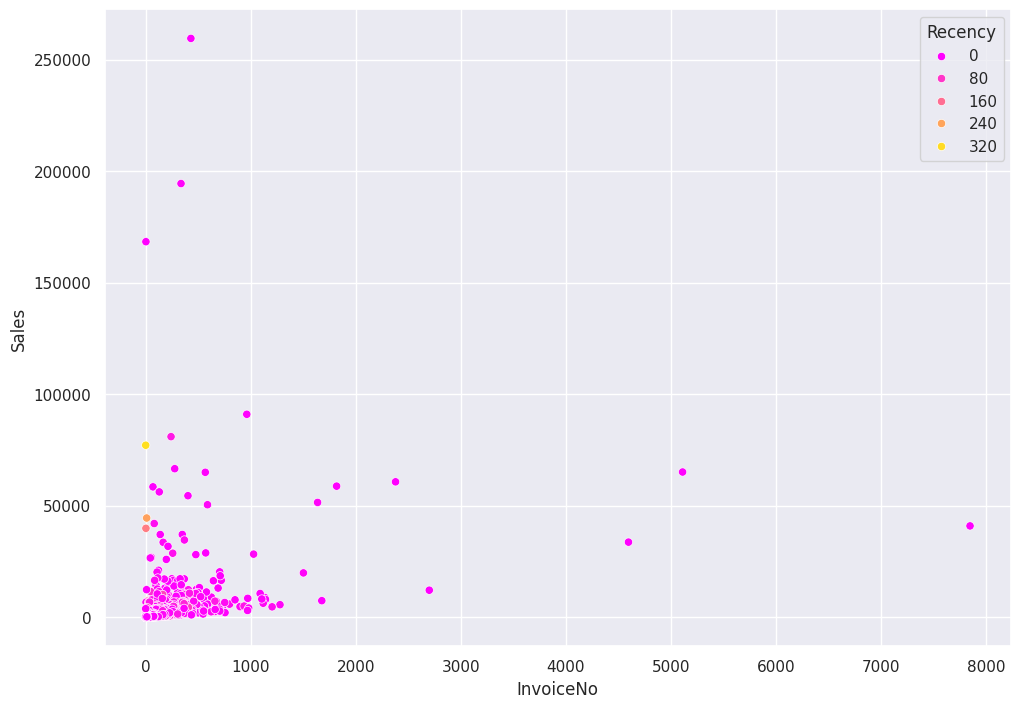

In [ ]:
sns.scatterplot(x='InvoiceNo', y='Sales',hue='Recency',data=cust_df,palette='spring')
plt.show()

# Standerdise the data

In [ ]:
import numpy as np
cust_df['Recency_log']=np.log(cust_df.Recency+0.1)
cust_df['Monetory_log']= np.log(cust_df.Sales+0.1)
cust_df['Frequency_log'] = np.log(cust_df.InvoiceNo)

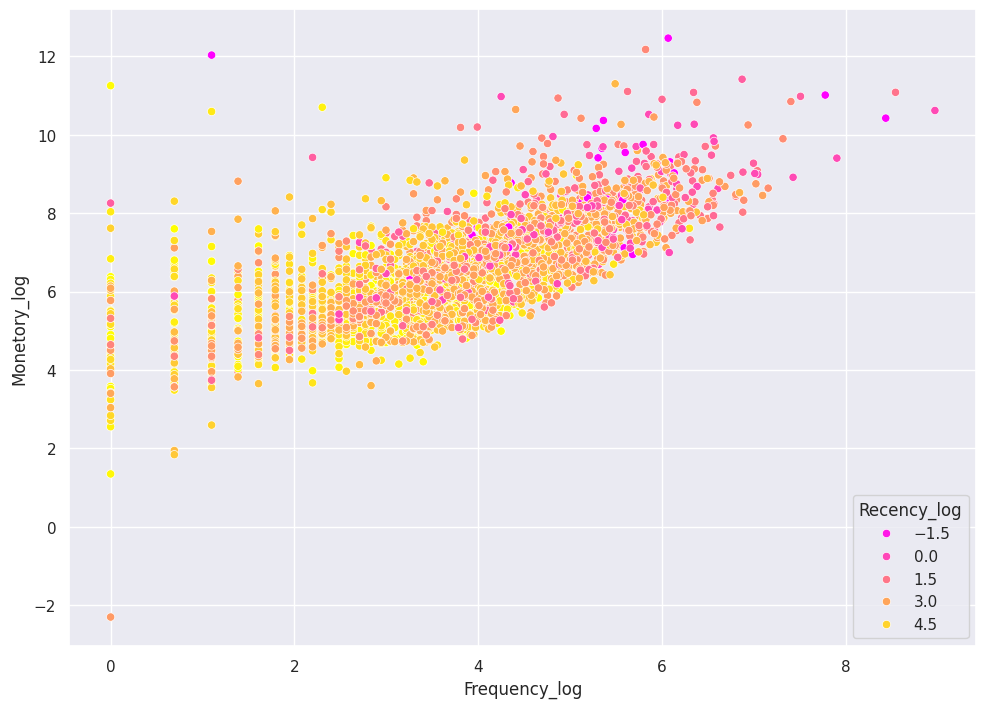

In [ ]:
sns.scatterplot(x='Frequency_log', y='Monetory_log',hue='Recency_log',data=cust_df,palette='spring')
plt.show()

# Apply K_means

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
km=KMeans(n_clusters=2, #NO: of clusters
          n_init=10,  #how many times kmean will be run with random centroid starts
          max_iter=300)  #maximum iterations

In [ ]:
km.fit(cust_df[['Frequency_log','Recency_log','Monetory_log']])

KMeans(n_clusters=2, n_init=10)

In [ ]:
cust_df['k_2'] = km.predict(cust_df[['Frequency_log','Recency_log','Monetory_log']])

In [ ]:
cust_df.sample(n=10)

,CustomerID,Recency,InvoiceNo,Sales,Recency_log,Monetory_log,Frequency_log,k_2
882,17128.0,334,14,157.09,5.811440,5.057455,2.639057,1
3114,13566.0,40,176,874.71,3.691376,6.774007,5.170484,0
1005,16997.0,288,12,702.00,5.663308,6.554076,2.484907,1
1086,14341.0,45,129,2182.28,3.808882,7.688171,4.859812,0
1985,15201.0,87,69,1236.54,4.467057,7.120153,4.234107,1
614,16726.0,26,185,1382.02,3.261935,7.231374,5.220356,0
1337,16431.0,213,83,642.81,5.361762,6.466005,4.418841,1
1053,15497.0,17,15,1262.20,2.839078,7.140691,2.708050,0
917,15189.0,1,212,16225.39,0.095310,9.694339,5.356586,0
1454,13118.0,19,79,1197.81,2.949688,7.088334,4.369448,0


# Exploit 2 Clusters

In [ ]:
km.cluster_centers_

array([[4.75086098, 2.54272862, 7.54431965],
       [2.8705562 , 4.58257725, 5.81322349]])

**Visualize clusters**



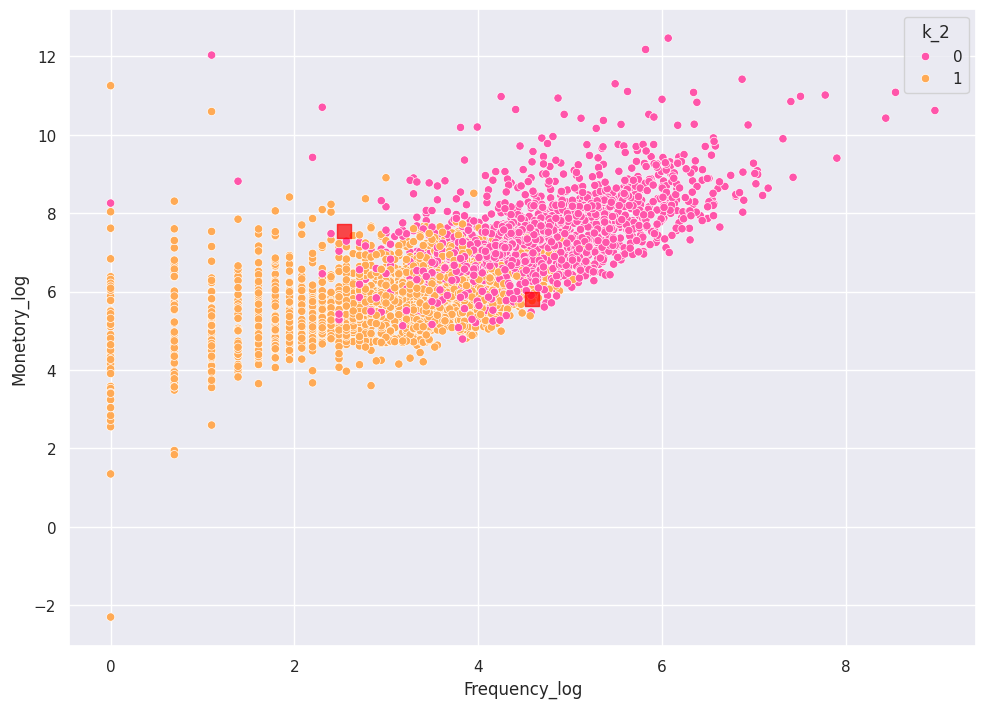

In [ ]:
sns.scatterplot(x='Frequency_log',y='Monetory_log',hue='k_2',data=cust_df,palette='spring')
plt.scatter(km.cluster_centers_[:,1],km.cluster_centers_[:,2],s=100,marker='s',c='red',alpha=0.7,label='Centroids')

# Sum of Squred Errors

In [ ]:
km.inertia_  #WCSS

12012.366582876315

# What Clusters tell about datasets

In [ ]:
cust_df.groupby('k_2').agg({'Sales':'median',
                            'InvoiceNo':'median',
                            'Recency':'median'
                            })

,Sales,InvoiceNo,Recency
k_2,,,
0,1797.57,113.0,16.0
1,336.40,20.0,108.0


#  How many clusters to use?

# Initail a list to track SSE for KMeans with diff k

In [ ]:
sse_df=pd.DataFrame(columns=['k','SSE'])
for i in range(2,11):

   #Initalize kmeans
   km=KMeans(n_clusters=i,n_init=10,max_iter=300)

   #Fit on the data
   km.fit(cust_df[['Frequency_log','Recency_log','Monetory_log']])

   #Add cluster information about for each record item
   cust_df['k_' + str(i)] = km.predict(cust_df[['Frequency_log','Recency_log','Monetory_log']])

   #Track k,SSE information
   sse_df.loc[sse_df.shape[0]] =[i,km.inertia_]

In [ ]:
cust_df.head()

,CustomerID,Recency,InvoiceNo,Sales,Recency_log,Monetory_log,Frequency_log,k_2,k_3,k_4,k_5,k_6,k_7,k_8,k_9,k_10
0,17850.0,372,297,5391.21,5.919163,8.592544,5.693732,1,0,3,2,3,0,3,0,7
1,13047.0,31,172,3237.54,3.437208,8.082600,5.147494,1,0,3,2,0,6,7,6,2
2,13748.0,95,28,948.25,4.554929,6.854724,3.332205,0,0,3,4,3,0,3,0,3
3,15100.0,333,3,876.00,5.808443,6.775480,1.098612,0,1,1,0,4,5,5,7,0
4,15291.0,25,103,4668.30,3.222868,8.448572,4.634729,1,0,3,2,0,6,7,6,2


In [ ]:
sse_df   #The k  increases sse value decresses

,k,SSE
0,2.0,12012.480518
1,3.0,9228.339383
2,4.0,7723.432429
3,5.0,6562.977868
4,6.0,5904.497525
5,7.0,5300.039075
6,8.0,4872.271532
7,9.0,4550.373091
8,10.0,4271.406270


<Axes: xlabel='k', ylabel='SSE'>

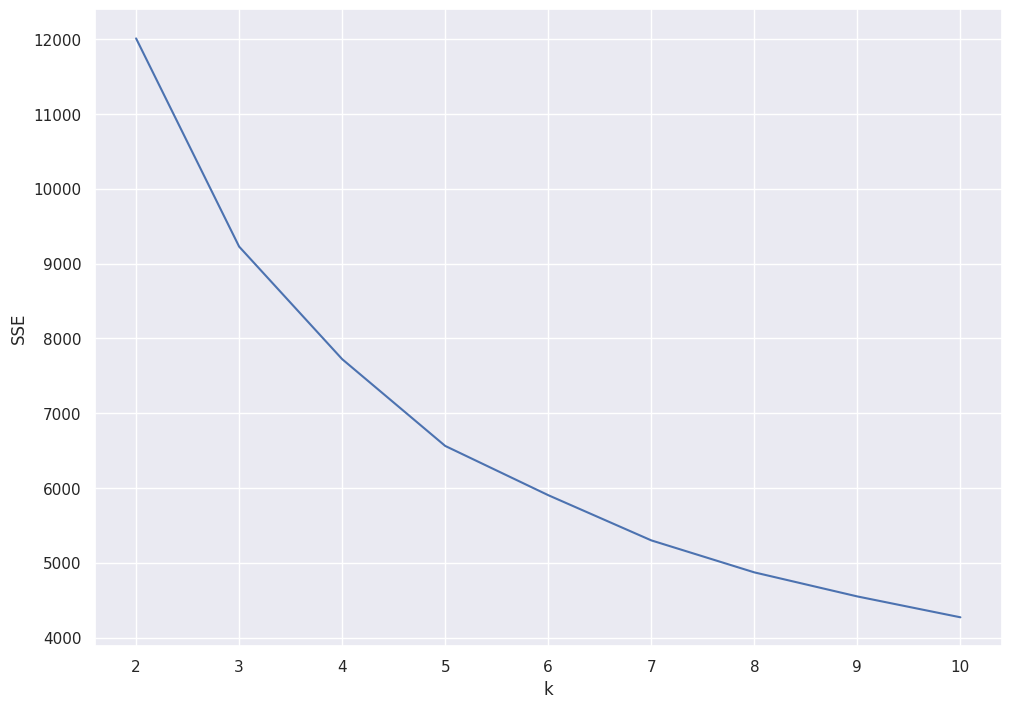

In [ ]:
sns.lineplot(x='k',y='SSE',data=sse_df)

# Vizualise clusters with k=5

,Sales,InvoiceNo,Recency
k_5,,,
0,152.025,7.0,176.0
1,3347.310,195.0,4.0
2,1598.170,106.0,35.5
3,420.910,29.0,18.0
4,429.245,28.0,149.0


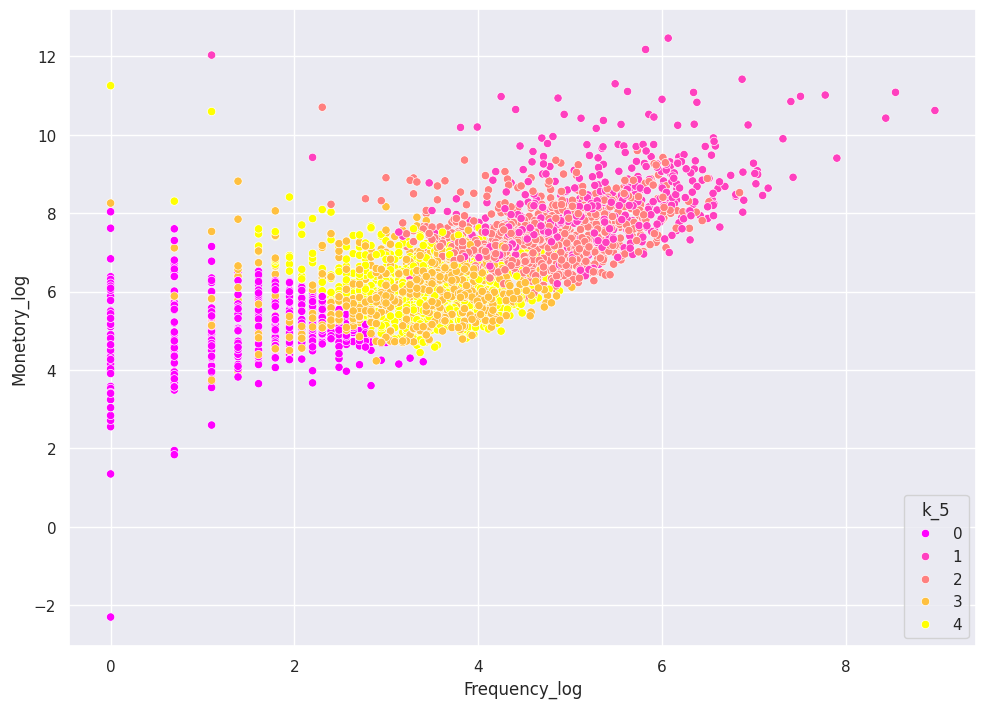

In [ ]:
sns.scatterplot(x='Frequency_log',y='Monetory_log',hue='k_5',data=cust_df,palette='spring')
cust_df.groupby('k_5').agg({'Sales':'median',
                            'InvoiceNo':'median',
                            'Recency':'median'
                            })


,Sales,InvoiceNo,Recency
k_7,,,
0,936.080,60.0,68.0
1,864.585,57.5,7.0
2,317.620,21.0,218.0
3,301.320,17.0,35.0
4,4629.150,268.5,2.0
5,125.790,5.0,205.0
6,2622.570,166.0,22.0


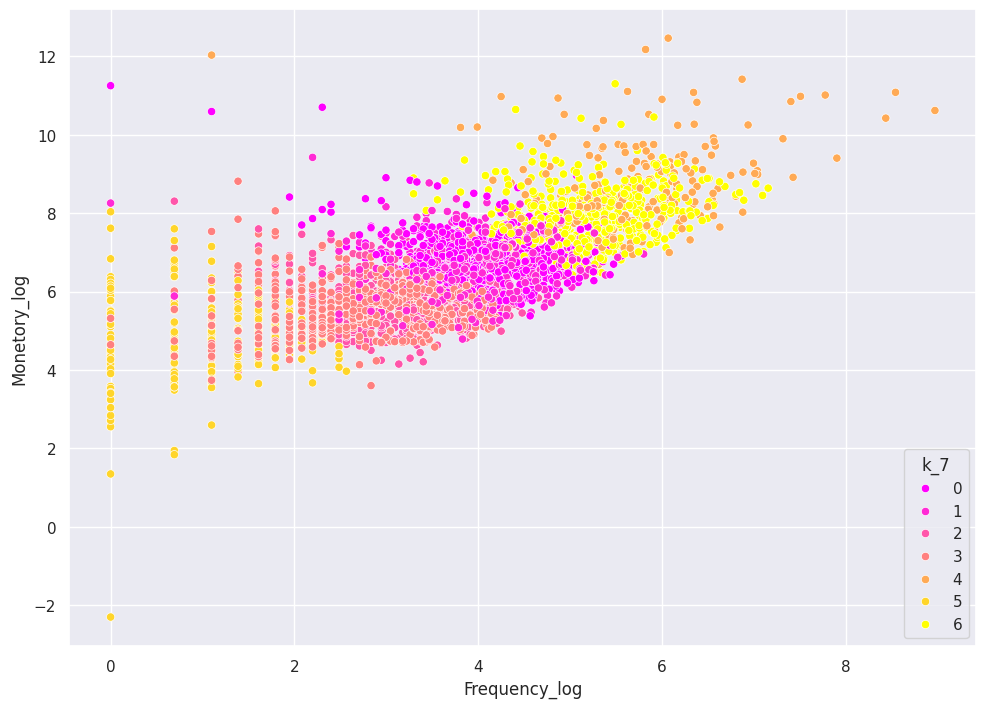

In [ ]:
sns.scatterplot(x='Frequency_log',y='Monetory_log',hue='k_7',data=cust_df,palette='spring')
cust_df.groupby('k_7').agg({'Sales':'median',
                            'InvoiceNo':'median',
                            'Recency':'median'})   #try k_7